#Telecom Customer Churn Analysis

Customer churn poses a significant challenge for telecom companies, as acquiring new customers is considerably more expensive than retaining existing ones. Understanding the key factors that influence customer churn is essential for improving customer retention strategies and reducing revenue loss.

The objective of this project is to analyze customer demographic, service usage, and billing information to identify patterns and drivers of customer churn. Through comprehensive exploratory data analysis (EDA), statistical insights, and feature engineering, the study aims to uncover high-risk customer segments and provide data-driven recommendations that can help the organization proactively reduce churn and improve customer lifetime value.

This analysis also prepares the dataset for future predictive modeling, enabling early identification of customers likely to churn.

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:

telco_base_data = pd.read_csv('/content/Telco-Customer-Churn.csv')



In [7]:

telco_base_data.head()
 #he top 5 records of data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:

telco_base_data.shape #Check the various attributes of data like shape (rows and cols), Columns, datatypes

(7043, 21)

In [24]:

telco_base_data.dtypes# Checking the data types of all the columns

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is a categorical variable, therefore percentile-based statistics (25%, 50%, 75%) are not meaningful for its interpretation. It should instead be analyzed using value counts or proportions.

Tenure analysis shows that 75% of customers have a tenure of less than 55 months, indicating that a majority of users are relatively short- to mid-term customers.

The average monthly charge is USD 64.76, while 25% of customers pay more than USD 89.85 per month, suggesting a high-paying customer segment that may require targeted retention strategies.

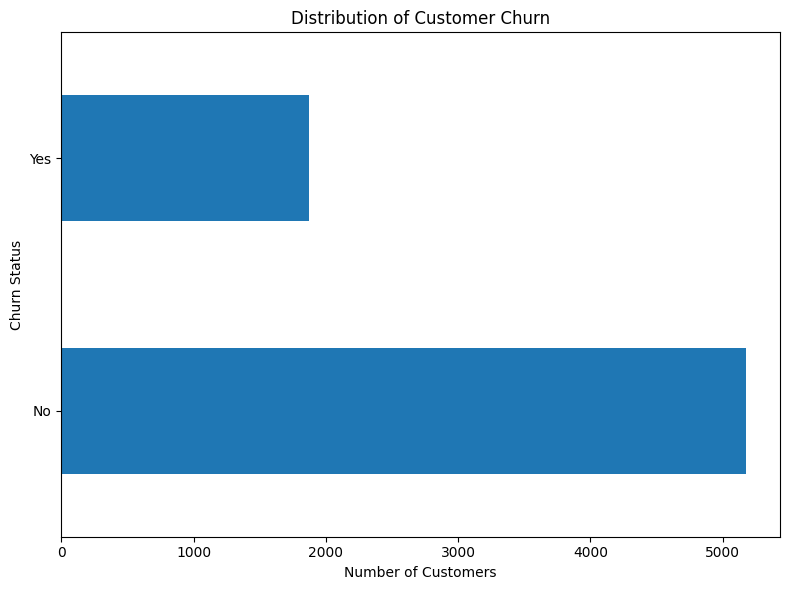

In [14]:
plt.figure(figsize=(8, 6))
telco_base_data['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Number of Customers")
plt.ylabel("Churn Status")
plt.title("Distribution of Customer Churn")
plt.tight_layout()
plt.show()


The target variable Churn is imbalanced, with a significantly higher number of non-churned customers compared to churned customers. This class imbalance should be considered during model training and evaluation, particularly when selecting appropriate performance metrics such as precision, recall, and ROC-AUC instead of accuracy alone.

In [18]:

100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])#calculates the percentage distribution of the target variable (Churn).



,count
Churn,
No,73.463013
Yes,26.536987


In [17]:
telco_base_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


The target variable Churn is imbalanced, with 73.46% non-churned customers (5,174) and 26.54% churned customers (1,869), resulting in a class ratio of approximately 73:27.

Due to this class imbalance, overall accuracy alone may be misleading. Therefore, the data is analyzed by examining feature-wise relationships with the target variable separately to uncover meaningful patterns and drivers of churn.

In [19]:
telco_base_data.info(verbose = True) # Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


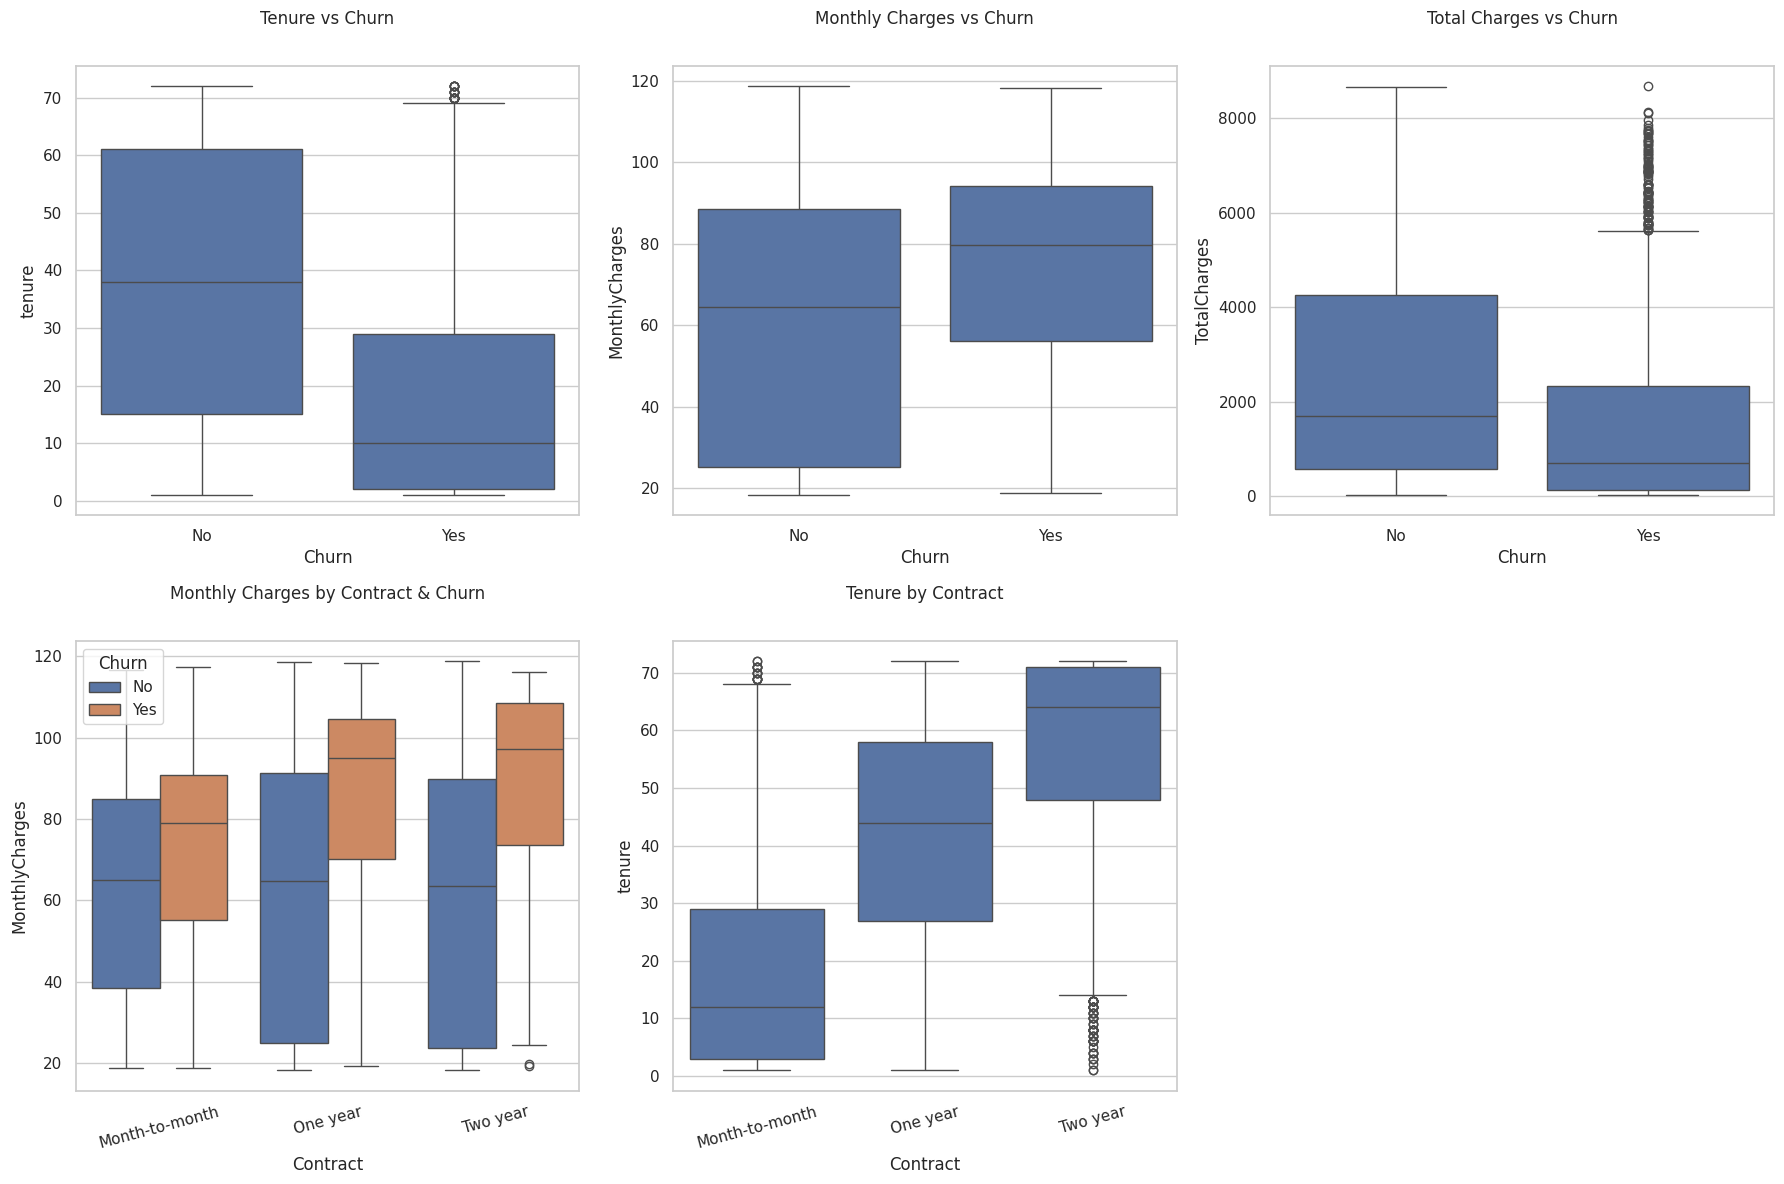

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make a copy of telco_base_data for plotting to preserve original data
# and ensure 'TotalCharges' is numeric as it was processed earlier.
plot_df = telco_base_data.copy()
plot_df['TotalCharges'] = pd.to_numeric(plot_df['TotalCharges'], errors='coerce')
# Drop rows with NaN in TotalCharges to align with previous data cleaning
plot_df.dropna(subset=['TotalCharges'], inplace=True)

sns.set(style="whitegrid")

plt.figure(figsize=(18,12))

# 1. Tenure vs Churn
plt.subplot(2,3,1)
sns.boxplot(x='Churn', y='tenure', data=plot_df) # Changed df to plot_df
plt.title('Tenure vs Churn')

# 2. MonthlyCharges vs Churn
plt.subplot(2,3,2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=plot_df) # Changed df to plot_df
plt.title('Monthly Charges vs Churn')

# 3. TotalCharges vs Churn
plt.subplot(2,3,3)
sns.boxplot(x='Churn', y='TotalCharges', data=plot_df) # Changed df to plot_df
plt.title('Total Charges vs Churn')

# 4. MonthlyCharges vs Contract with Churn
plt.subplot(2,3,4)
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=plot_df) # Changed df to plot_df
plt.title('Monthly Charges by Contract & Churn')
plt.xticks(rotation=15)

# 5. Tenure vs Contract
plt.subplot(2,3,5)
sns.boxplot(x='Contract', y='tenure', data=plot_df) # Changed df to plot_df
plt.title('Tenure by Contract')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

Churned customers have low tenure, meaning most churn happens in the early months.

Higher monthly charges increase churn risk, showing price sensitivity.

Non-churn customers generate higher total charges, indicating higher lifetime value.

Month-to-month contracts churn the most, especially with high charges.

Long-term contracts retain customers better with more stable tenure.

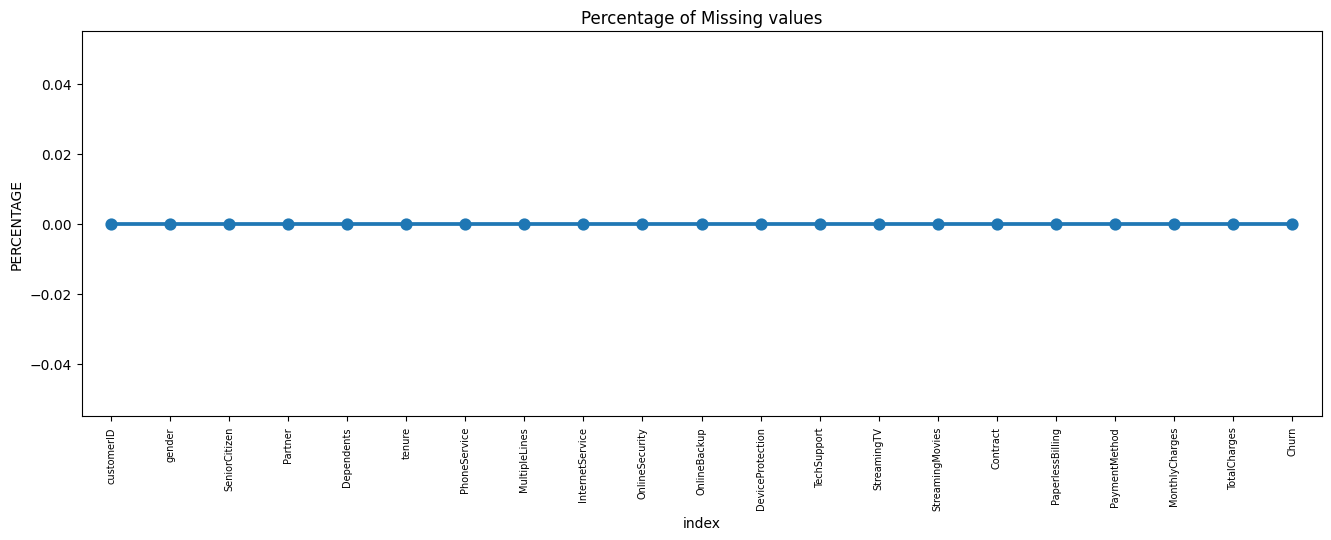

In [21]:
missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

#Missing Data – Initial Intuition

The dataset does not contain any missing values, indicating good data quality.

General thumb rules:

Features with a small number of missing values can be handled using imputation methods such as mean, median, mode, or regression, depending on the feature type.

Features with a very high percentage of missing values may be considered for removal, as they often provide limited analytical value.

Although there is no fixed rule, columns with more than 30–40% missing values are typically reviewed before modeling.

However, missing values can be meaningful.
For example, in a telecom dataset, customers who do not subscribe to internet services will have features such as Online_Security, Online_Backup, or Streaming_TV recorded as missing. These missing values indicate non-applicability rather than poor data quality, making such features important for understanding customer behavior and churn patterns.


#Data Cleaning

In [27]:

#1. Create a copy of base data for manupulation & processing
telco_data = telco_base_data.copy()

In [28]:

#2. Total Charges should be numeric amount. Let's convert it to numerical data type
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


 As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [29]:

telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.


In [30]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)

#Divide customers
 into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [31]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [32]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)
telco_data['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


Remove columns not required for processing

In [33]:

#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12



#Data Exploration
plot distibution of individual predictors by churn

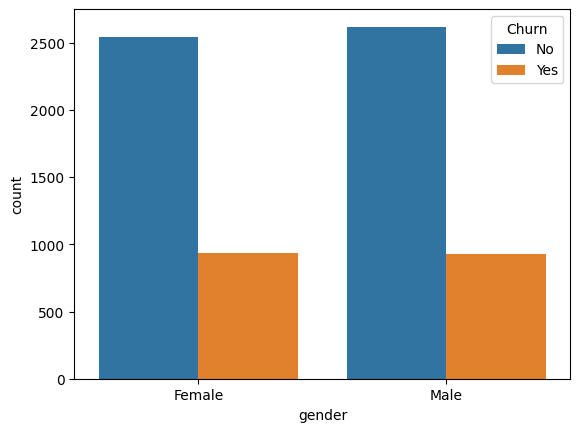

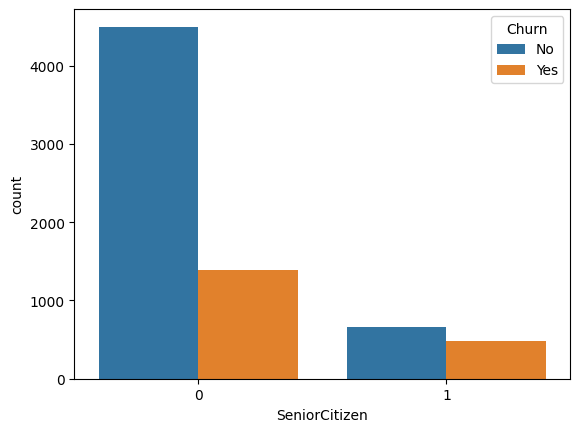

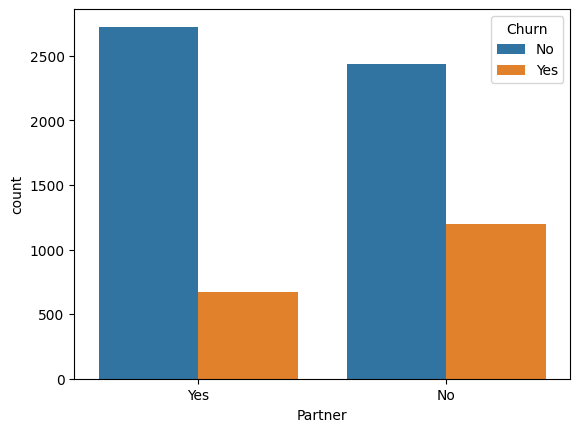

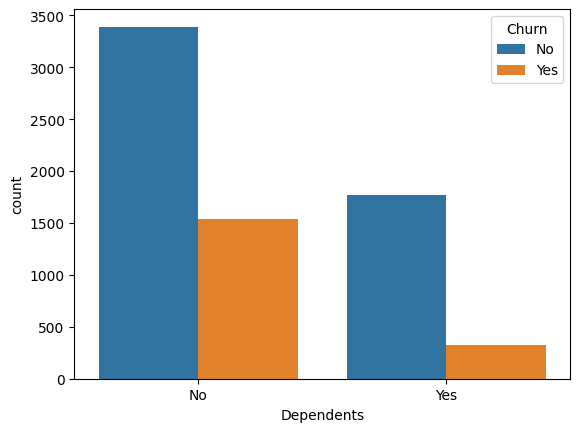

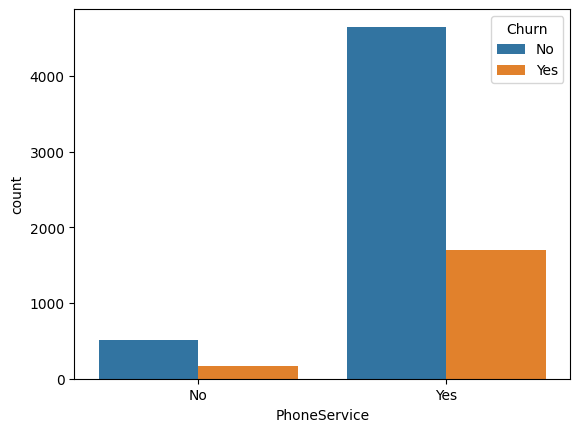

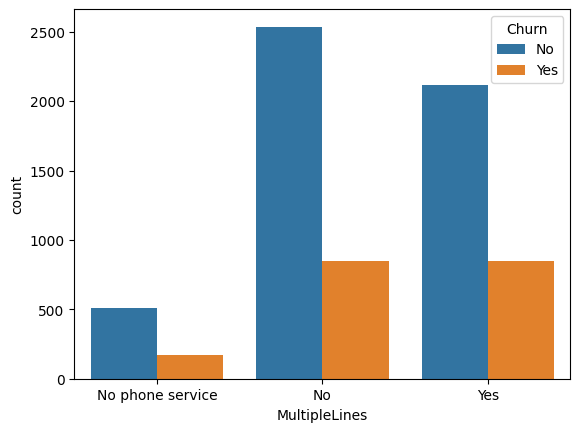

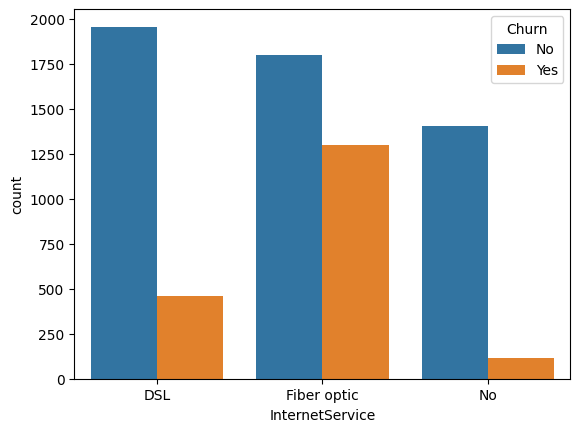

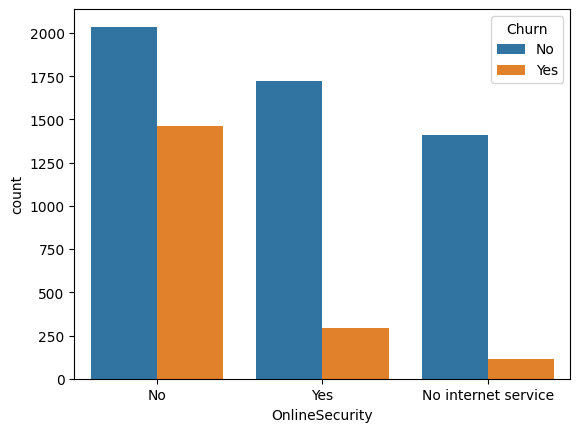

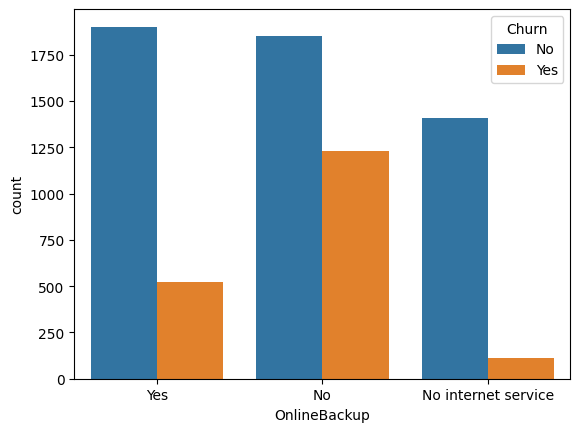

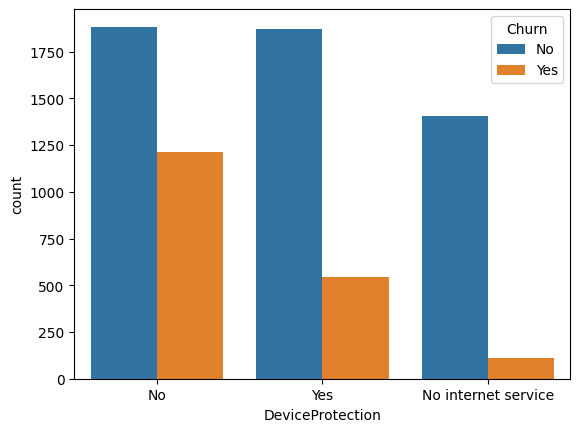

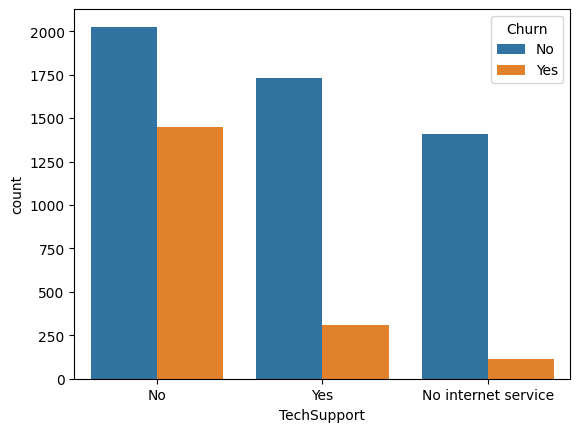

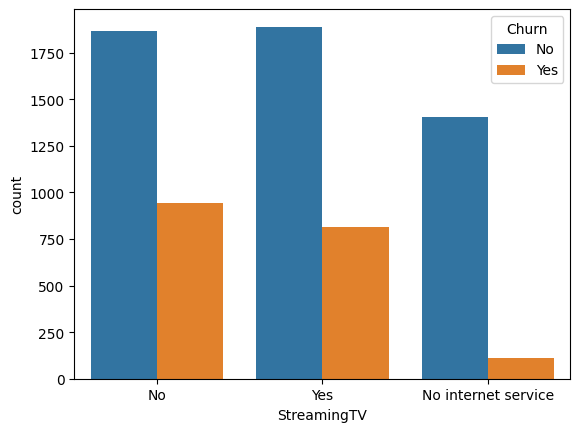

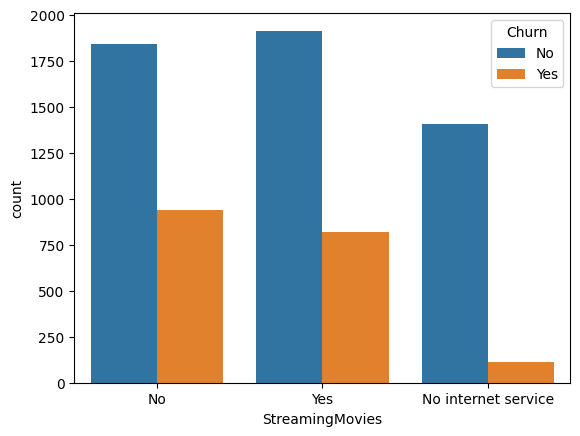

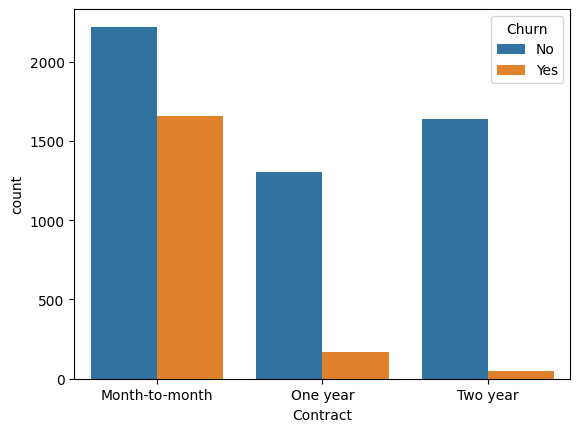

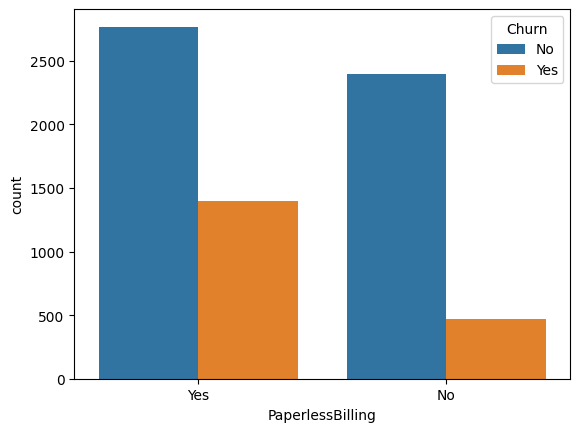

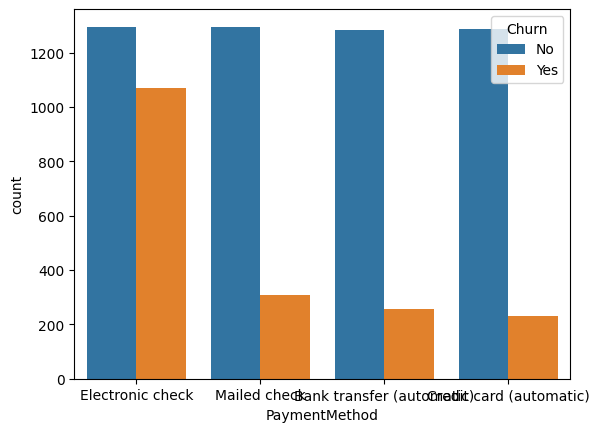

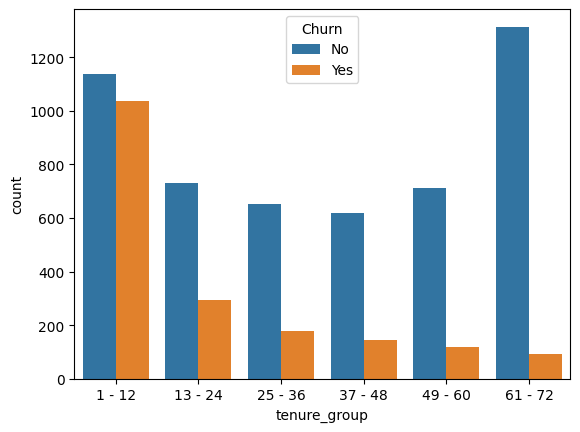

In [34]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

2. Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [35]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12



3. Convert all the categorical variables into dummy variables


In [36]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


 Relationship between Monthly Charges and Total Charges

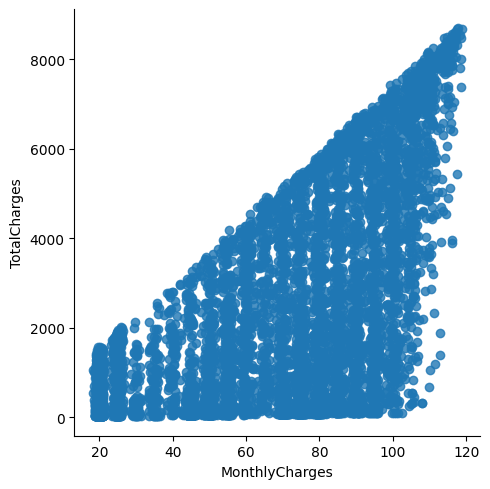

In [37]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


Insight: Total Charges increase as Monthly Charges increase - as expected.

Churn by Monthly Charges and Total Charges

/tmp/ipython-input-3935309874.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
/tmp/ipython-input-3935309874.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

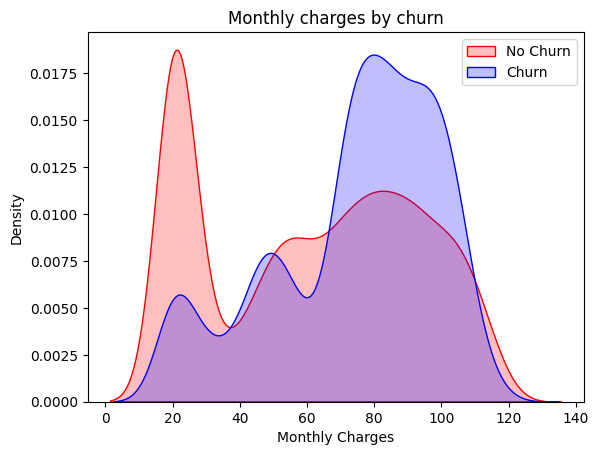

In [38]:

Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Insight: Churn is high when Monthly Charges ar high

/tmp/ipython-input-4019118049.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
/tmp/ipython-input-4019118049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

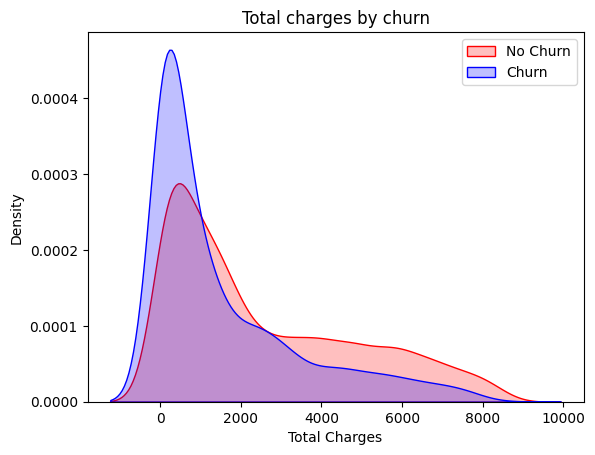

In [40]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

An initially surprising observation shows higher churn among customers with lower total charges. However, when analyzed jointly with tenure and monthly charges, the pattern becomes clear. Customers with short tenure but high monthly charges tend to accumulate lower total charges and exhibit significantly higher churn. This indicates that early-stage customers exposed to higher pricing are more likely to churn, highlighting the combined influence of tenure, pricing, and total spend on churn behavior.

Build a corelation of all predictors with 'Churn

<Axes: >

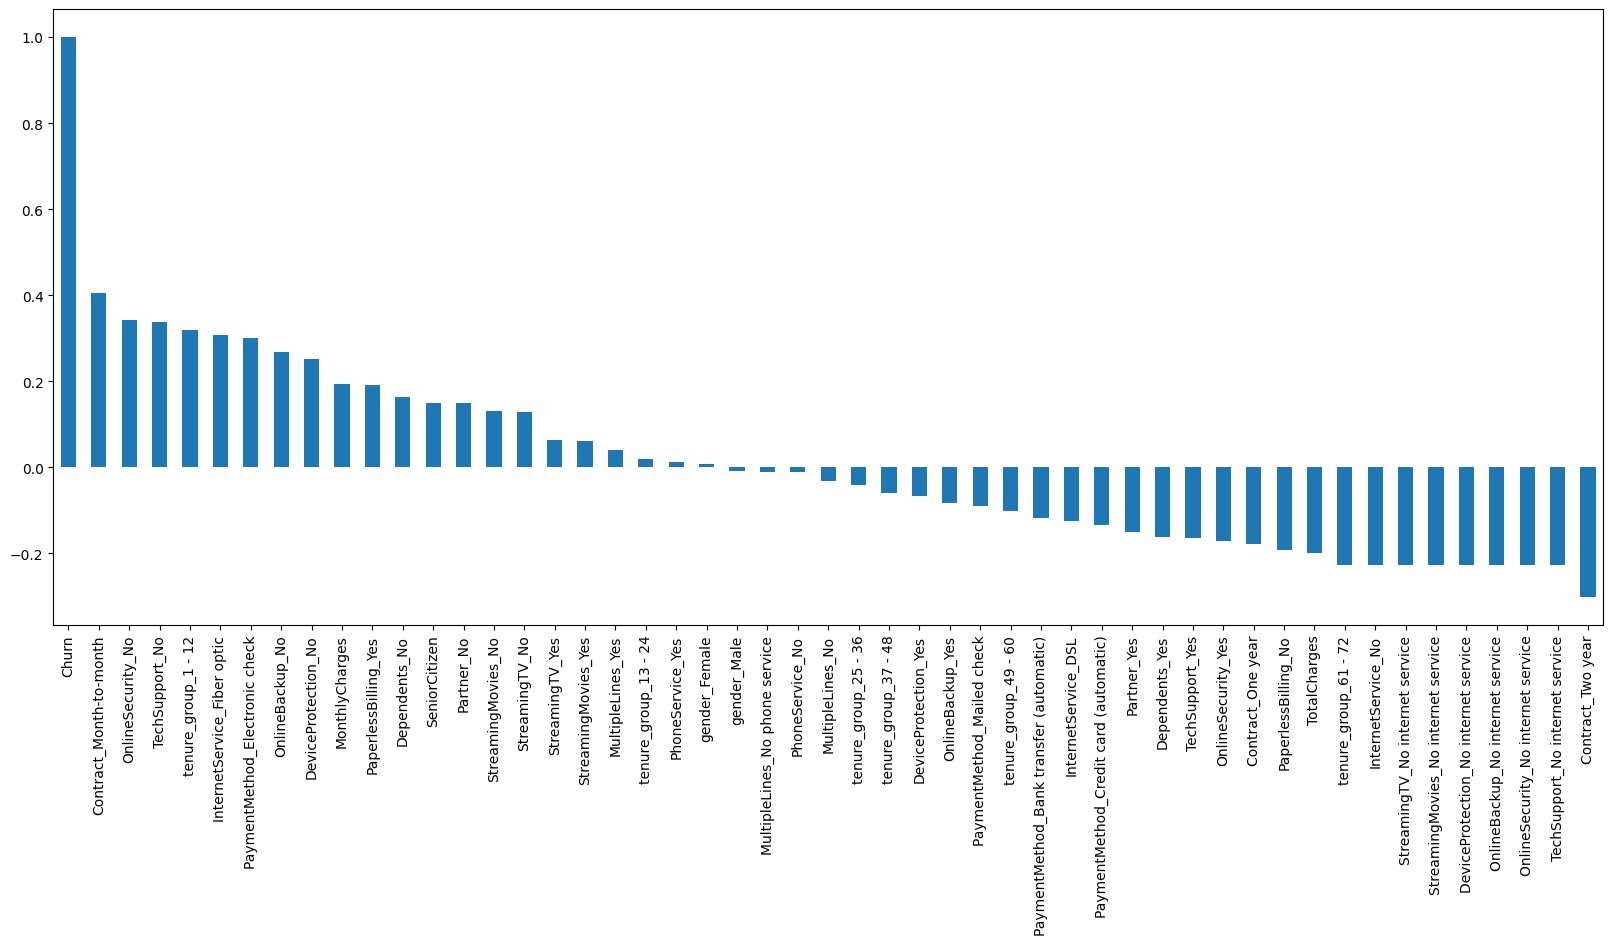

In [41]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

The correlation analysis reveals that churn is strongly associated with month-to-month contracts, absence of online security, absence of technical support, early-stage customers (first year of subscription), and fiber optic internet service. These factors show a positive correlation with churn, indicating higher churn risk.

Conversely, long-term contracts, customers without internet service, and customers with more than five years of tenure exhibit a strong negative correlation with churn, suggesting higher customer retention.

Features such as gender, phone service availability, and multiple lines show near-zero correlation with churn, indicating minimal impact on customer attrition.

<Axes: >

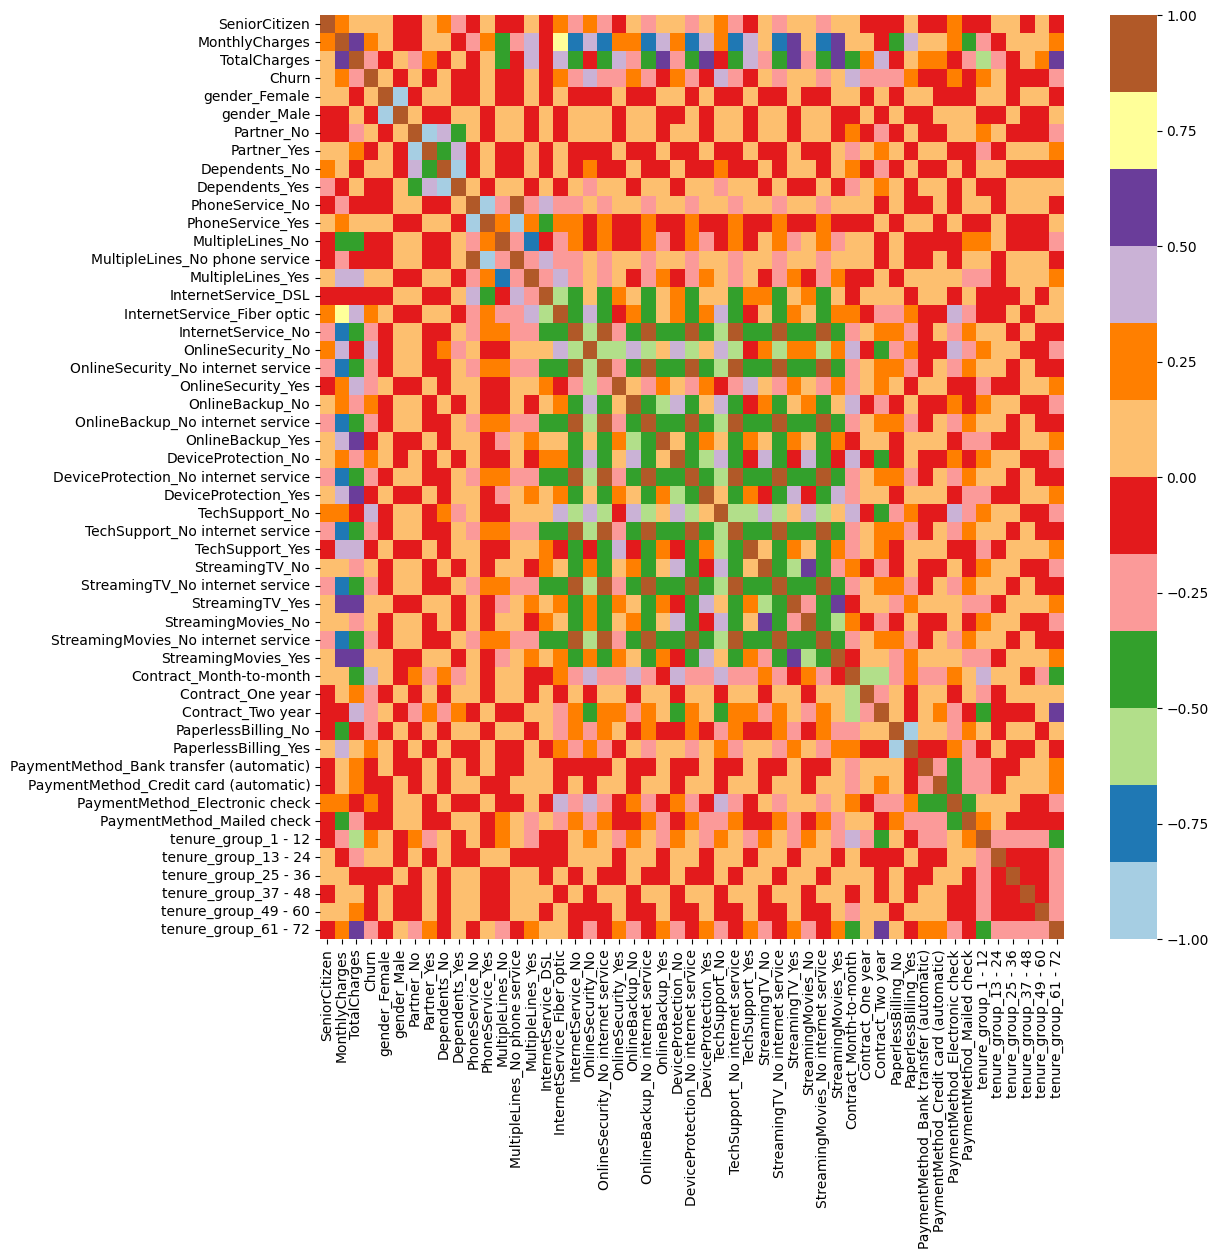

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

The heatmap visually reinforces these findings by showing:

Stronger color intensity for churn-related variables (high impact)

Near-neutral shades for low-impact features

#Bivariate Analysis

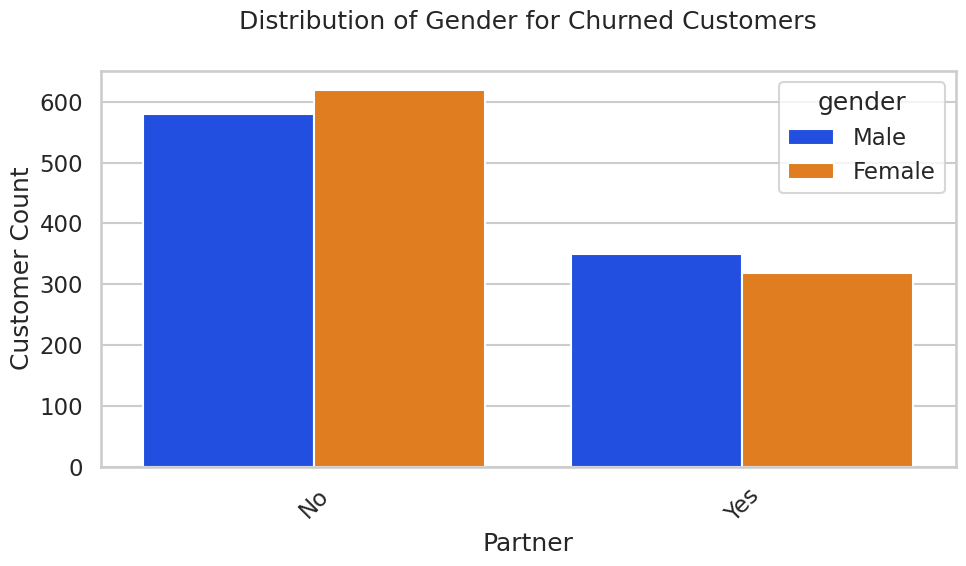

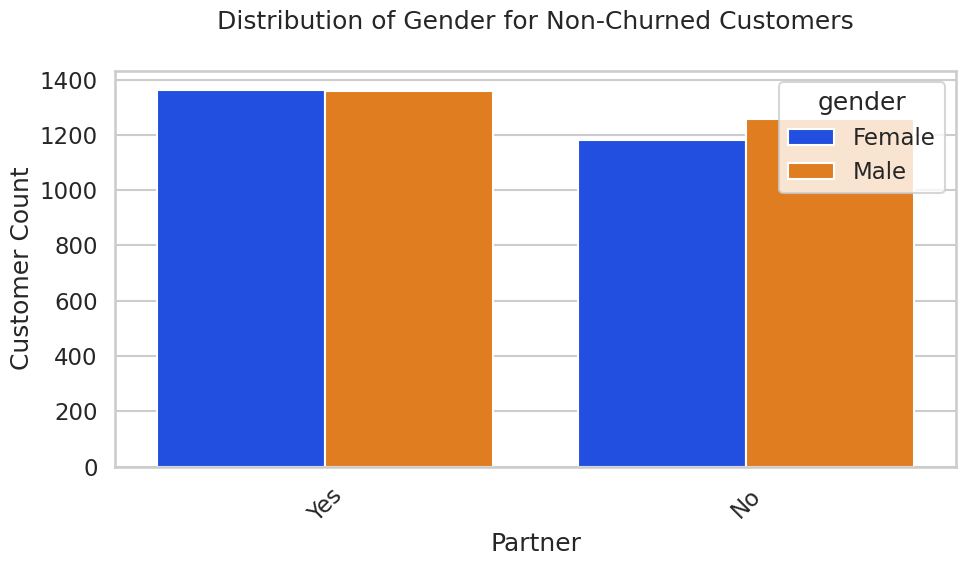

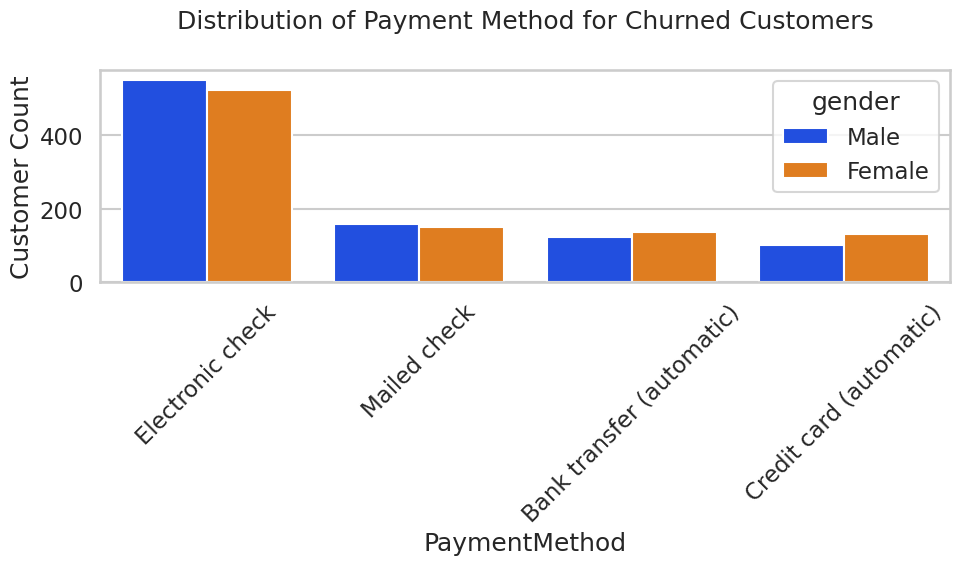

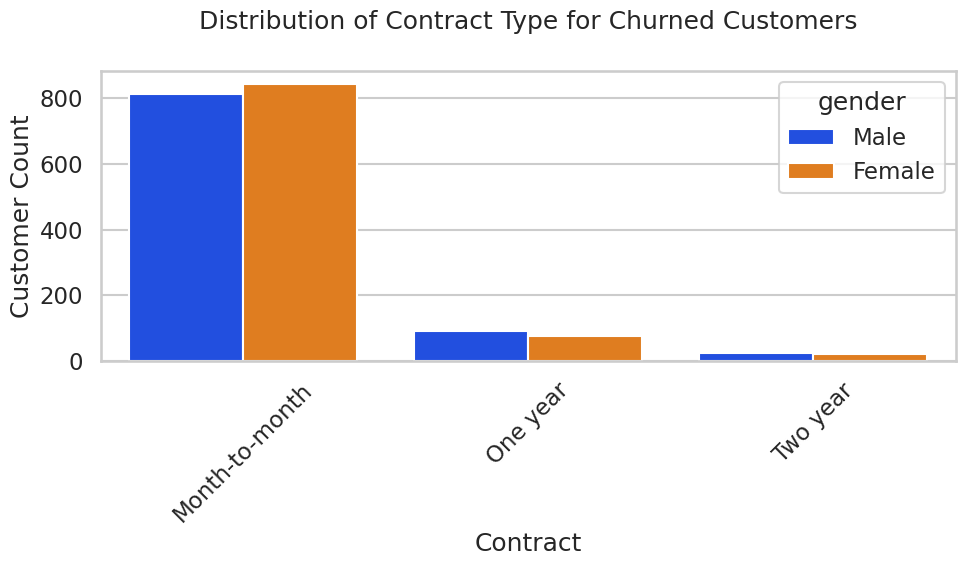

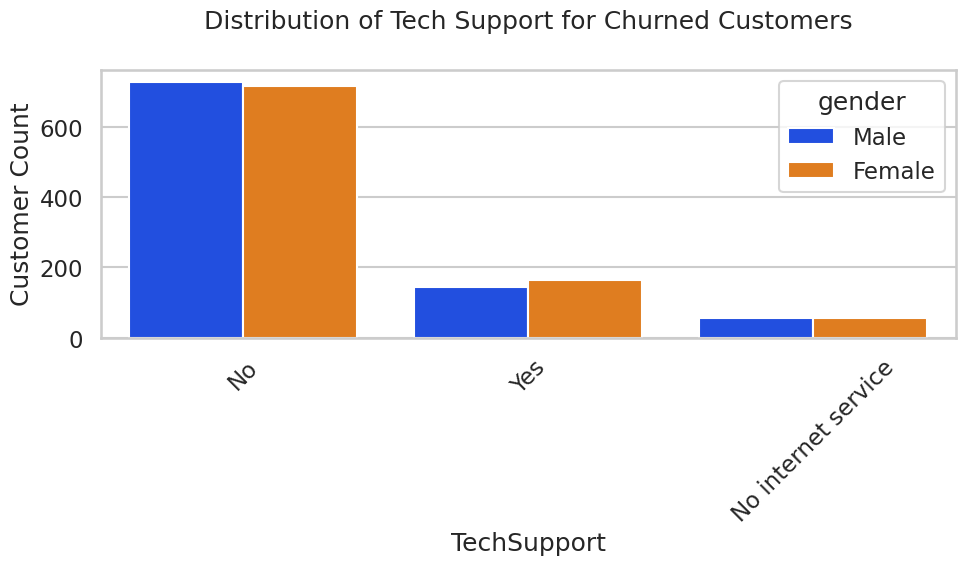

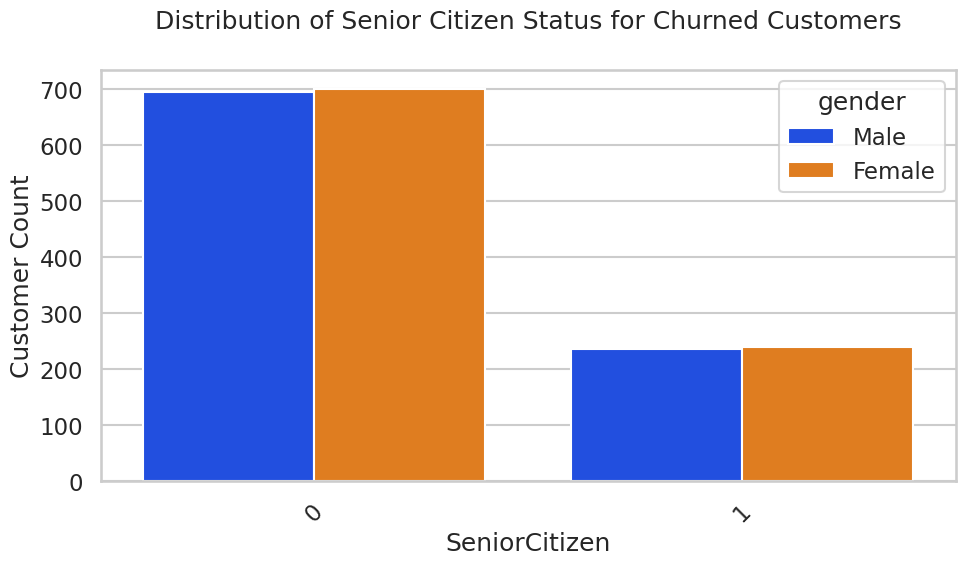

In [58]:
# Split data based on Churn
new_df1_target0 = telco_data[telco_data["Churn"] == 0]
new_df1_target1 = telco_data[telco_data["Churn"] == 1]

# Function to plot categorical feature distributions
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')

    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=df,
        x=col,
        hue=hue,
        order=df[col].value_counts().index,
        palette='bright'
    )

    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Customer Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualizations
uniplot(new_df1_target1, col='Partner',
        title='Distribution of Gender for Churned Customers',
        hue='gender')

uniplot(new_df1_target0, col='Partner',
        title='Distribution of Gender for Non-Churned Customers',
        hue='gender')

uniplot(new_df1_target1, col='PaymentMethod',
        title='Distribution of Payment Method for Churned Customers',
        hue='gender')

uniplot(new_df1_target1, col='Contract',
        title='Distribution of Contract Type for Churned Customers',
        hue='gender')

uniplot(new_df1_target1, col='TechSupport',
        title='Distribution of Tech Support for Churned Customers',
        hue='gender')

uniplot(new_df1_target1, col='SeniorCitizen',
        title='Distribution of Senior Citizen Status for Churned Customers',
        hue='gender')

# Save processed dataset
telco_data_dummies.to_csv('tel_churn.csv', index=False)


#Key Insights from Categorical Analysis

Electronic check payment method exhibits the highest churn, indicating potential issues related to payment convenience or trust.

Customers on month-to-month contracts show significantly higher churn compared to long-term contract holders, as they face no binding commitment.

Customers without online security and technical support services are more likely to churn, suggesting the importance of value-added service engagement.

Non-senior citizens demonstrate higher churn rates, indicating younger customers may be more price-sensitive or prone to switching providers.

Gender does not show a significant influence on churn, as churn patterns remain largely consistent across male and female customers.

🧠 Business Interpretation
These insights suggest that contract flexibility, service quality, and payment methods play a crucial role in customer retention. Improving early customer engagement, promoting long-term contracts, and encouraging adoption of support services could significantly reduce churn.

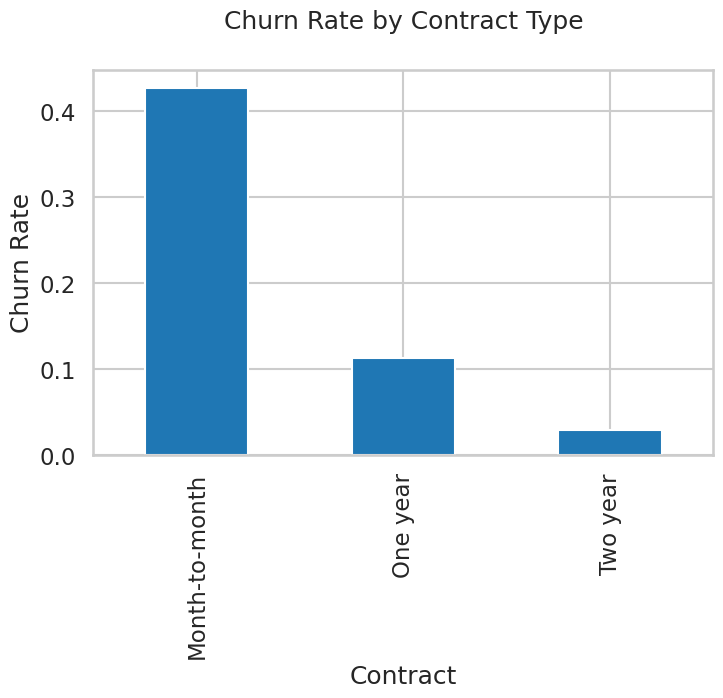

In [59]:
churn_rate = (
    telco_data.groupby('Contract')['Churn']
    .mean()
    .sort_values(ascending=False)
)

churn_rate.plot(kind='bar', figsize=(8,5))
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()

Month-to-month contracts exhibit the highest churn rate, indicating higher customer volatility.

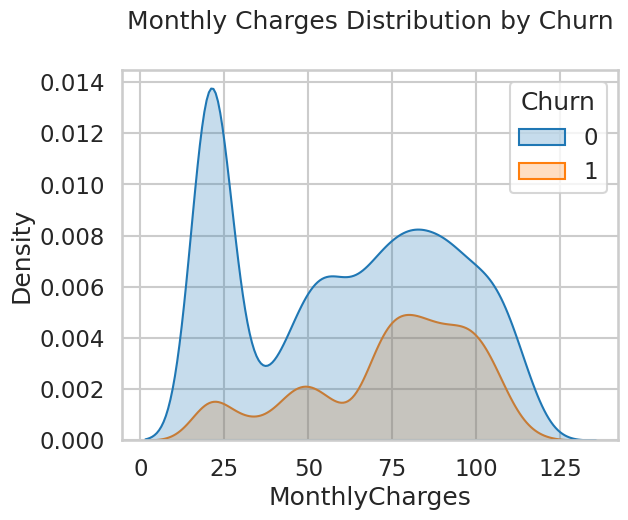

In [61]:
sns.kdeplot(
    data=telco_data,
    x='MonthlyCharges',
    hue='Churn',
    fill=True
)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

Churned customers tend to have higher monthly charges, highlighting pricing sensitivity.

 # MULTIVARIATE EDA

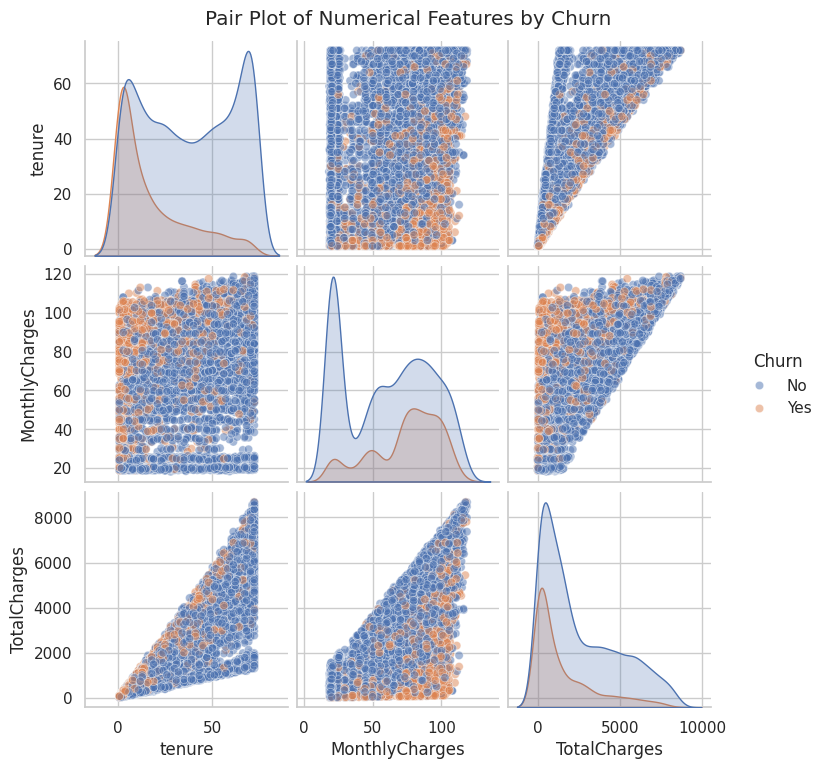

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select important numerical columns, now using 'plot_df' which retains 'tenure'
pair_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Pair plot using plot_df, which contains 'tenure' and numeric 'TotalCharges'
sns.pairplot(
    plot_df[pair_cols],
    hue='Churn',
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)

plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02)
plt.show()

Tenure vs Churn: Churned customers are heavily concentrated at low tenure, indicating early-stage churn.

MonthlyCharges vs Churn: Customers with higher monthly charges show a higher tendency to churn.

TotalCharges vs Churn: Non-churn customers dominate the high total charges region, reflecting higher lifetime value.

Tenure vs TotalCharges: A strong positive relationship exists—longer tenure leads to higher total charges.

MonthlyCharges vs Tenure: No strong linear relationship, suggesting pricing alone does not drive retention.

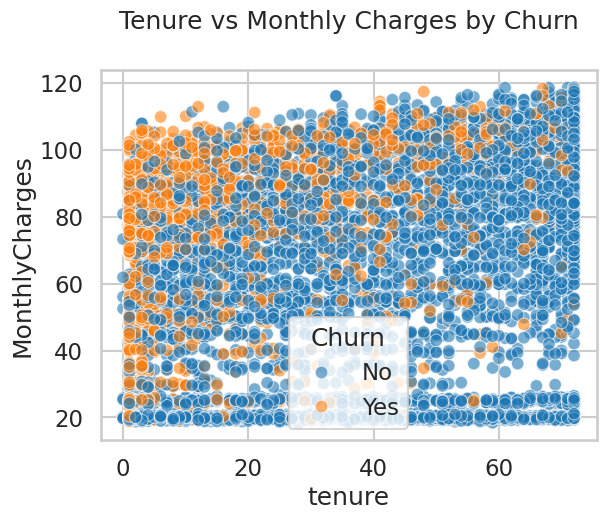

In [63]:
sns.scatterplot(
    data=telco_base_data,
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    alpha=0.6
)
plt.title("Tenure vs Monthly Charges by Churn")
plt.show()

High churn is concentrated among short-tenure customers with higher monthly charges.

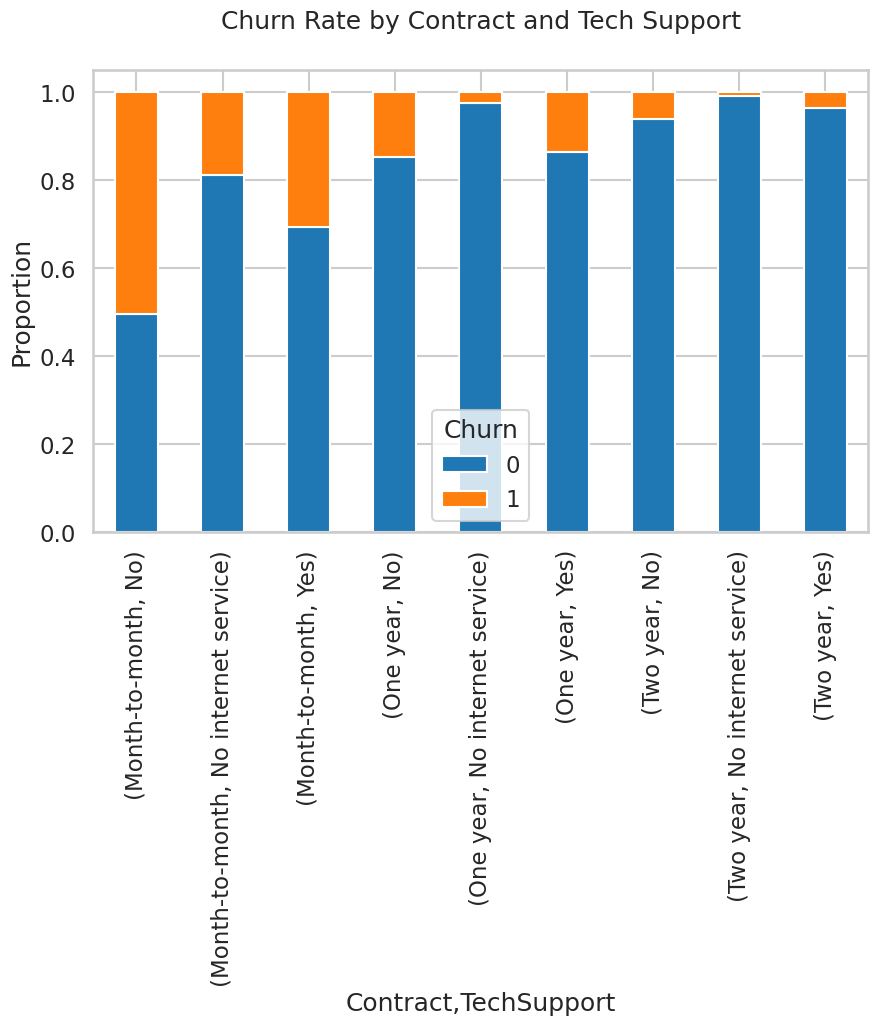

In [64]:
pd.crosstab(
    [telco_data['Contract'], telco_data['TechSupport']],
    telco_data['Churn'],
    normalize='index'
).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Churn Rate by Contract and Tech Support")
plt.ylabel("Proportion")
plt.show()

Customers on month-to-month contracts without tech support show the highest churn rates.

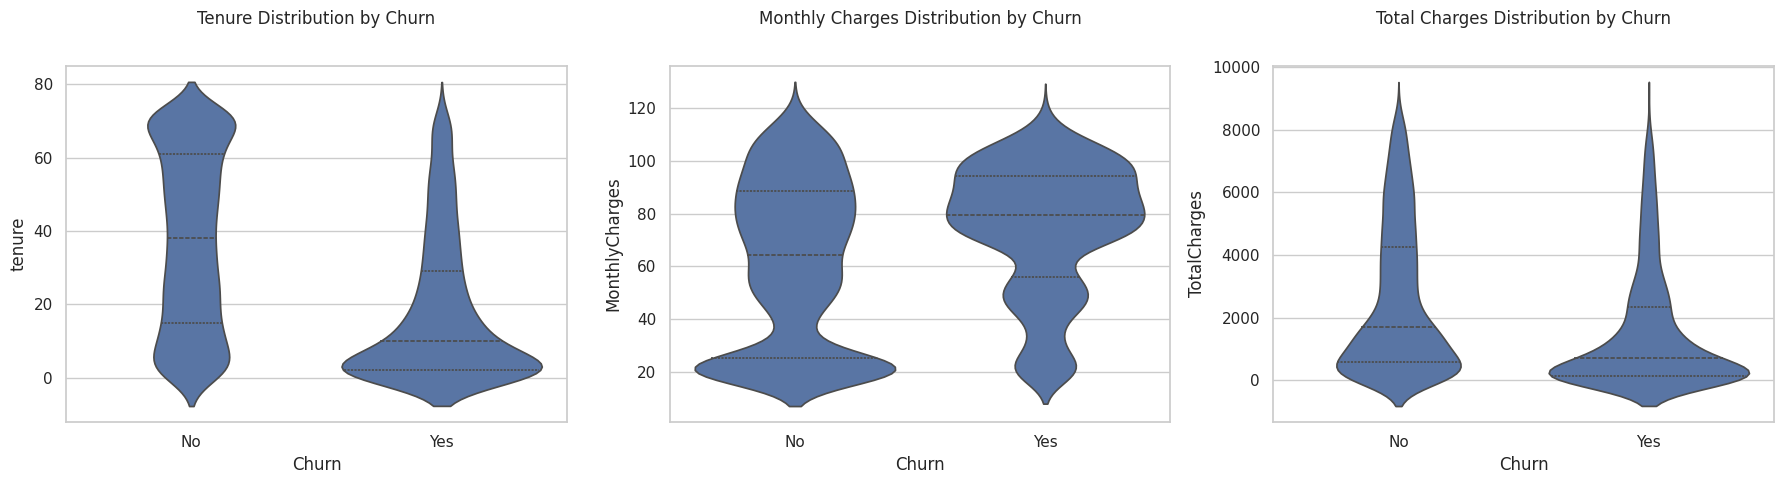

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(18,5))

# 1. Tenure vs Churn
plt.subplot(1,3,1)
sns.violinplot(x='Churn', y='tenure', data=plot_df, inner='quartile')
plt.title('Tenure Distribution by Churn')

# 2. Monthly Charges vs Churn
plt.subplot(1,3,2)
sns.violinplot(x='Churn', y='MonthlyCharges', data=plot_df, inner='quartile')
plt.title('Monthly Charges Distribution by Churn')

# 3. Total Charges vs Churn
plt.subplot(1,3,3)
sns.violinplot(x='Churn', y='TotalCharges', data=plot_df, inner='quartile')
plt.title('Total Charges Distribution by Churn')

plt.tight_layout()
plt.show()

1️⃣ Tenure vs Churn

The churned group shows a dense concentration at low tenure values.

Non-churn customers have a broader and right-skewed distribution, indicating long-term retention.

📌 Insight:

Customers are most likely to churn during the early months of service, highlighting a critical onboarding period.

2️⃣ Monthly Charges vs Churn

Churned customers display higher density at higher monthly charges.

Non-churn customers are more evenly distributed across charge ranges.

📌 Insight:

Higher pricing plans increase churn risk, especially when customer value is not yet established.

3️⃣ Total Charges vs Churn

Non-churn customers dominate the upper range of total charges, forming a long tail.

Churned customers cluster near the lower end, indicating early exits.

📌 Insight:

Churn occurs before customers generate significant lifetime revenue, causing potential revenue loss.

# STATISTICAL EDA

 Hypothesis Testing (Monthly Charges)

In [66]:
from scipy.stats import ttest_ind

churned = telco_data[telco_data['Churn']==1]['MonthlyCharges']
non_churned = telco_data[telco_data['Churn']==0]['MonthlyCharges']

ttest_ind(churned, non_churned)



TtestResult(statistic=np.float64(16.47959313114872), pvalue=np.float64(6.760843117980302e-60), df=np.float64(7030.0))

A statistically significant difference exists in monthly charges between churned and non-churned customers (p < 0.05).

 B. Categorical Association (Chi-Square Test)

In [67]:
from scipy.stats import chi2_contingency

table = pd.crosstab(telco_data['Contract'], telco_data['Churn'])
chi2_contingency(table)

Chi2ContingencyResult(statistic=np.float64(1179.5458287339445), pvalue=np.float64(7.326182186265472e-257), dof=2, expected_freq=array([[2845.08319113, 1029.91680887],
       [1080.76450512,  391.23549488],
       [1237.15230375,  447.84769625]]))

Contract type shows a statistically significant association with churn.


 # Model Building

In [82]:
#Importing Libraries
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [69]:
df=pd.read_csv("tel_churn.csv")
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


In [72]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,False
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,False,True,False,True,False,False,False,False,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,False,False,True,True,False,False,False,False,False


In [74]:
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


# Train Test Split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Decision Tree Classifier

In [76]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [77]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [78]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
model_dt.score(x_test,y_test)

0.8017057569296375

In [80]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1057
           1       0.62      0.52      0.57       350

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407





As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
Hence, moving ahead to call SMOTEENN (UpSampling + ENN)


In [90]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [91]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model_dt_smote = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9269131556319863
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       542
           1       0.91      0.96      0.93       621

    accuracy                           0.93      1163
   macro avg       0.93      0.92      0.93      1163
weighted avg       0.93      0.93      0.93      1163



Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

# Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [96]:
model_rf.score(x_test,y_test)

0.783226723525231

In [97]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1057
           1       0.62      0.52      0.57       350

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



In [100]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [101]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [103]:
model_rf_smote = RandomForestClassifier(random_state=42)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(random_state=42)

In [104]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [105]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [106]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9551986475063398
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       529
           1       0.95      0.96      0.96       654

    accuracy                           0.96      1183
   macro avg       0.96      0.95      0.95      1183
weighted avg       0.96      0.96      0.96      1183



In [107]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[499  30]
 [ 23 631]]


With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.
We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

# Performing PCA

In [108]:

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [109]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [110]:
yr_predict_pca = model.predict(xr_test_pca)

In [111]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [112]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7210481825866442
              precision    recall  f1-score   support

           0       0.74      0.59      0.65       529
           1       0.71      0.83      0.77       654

    accuracy                           0.72      1183
   macro avg       0.72      0.71      0.71      1183
weighted avg       0.72      0.72      0.72      1183



With PCA, we couldn't see any better results, hence let's finalise the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

# Pickling the model

In [113]:
import pickle

In [114]:
filename = 'model.sav'

0.9269131556319863

In [116]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [117]:
load_model = pickle.load(open(filename, 'rb'))

In [118]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [119]:
model_score_r1

0.9551986475063398

Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use and prepare API's so that we can access our model from UI.

📌 Project Summary
This project analyzes customer churn using exploratory data analysis to understand overall customer behavior and usage patterns. The data was explored using multiple visual and statistical techniques to identify general trends and differences between customers who stay and those who leave.

The analysis highlights that customer engagement, service usage, and billing-related factors play an important role in churn behavior. Dimensionality reduction was applied to simplify the dataset and support further analysis. Overall, the study provides high-level insights into churn dynamics and creates a solid foundation for future predictive modeling and decision-making.